<a href="https://colab.research.google.com/github/Raboooiii/Sem6/blob/main/LabCycle_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub
import os
import pandas as pd
import glob # Import glob for easier file searching

# Download dataset
path = kagglehub.dataset_download("faresashraf1001/supermarket-sales")

print("Path to dataset files:", path)

# Find the first CSV file in the downloaded directory or its subdirectories
csv_files = glob.glob(os.path.join(path, '**/*.csv'), recursive=True)

if csv_files:
    csv_file_path = csv_files[0] # Take the first CSV file found
    # Load dataset
    data = pd.read_csv(csv_file_path)
    print(f"Dataset loaded successfully from: {csv_file_path}")
    print(data.head())
else:
    print("No CSV file found in the dataset directory or its subdirectories.")

Using Colab cache for faster access to the 'supermarket-sales' dataset.
Path to dataset files: /kaggle/input/supermarket-sales
Dataset loaded successfully from: /kaggle/input/supermarket-sales/SuperMarket Analysis.csv
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel   

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Explicitly create a copy to avoid SettingWithCopyWarning
features = data[['Gender', 'Customer type', 'Sales', 'Quantity', 'Rating', 'gross income']].copy()

le = LabelEncoder()
features['Gender'] = le.fit_transform(features['Gender'])
features['Customer type'] = le.fit_transform(features['Customer type'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


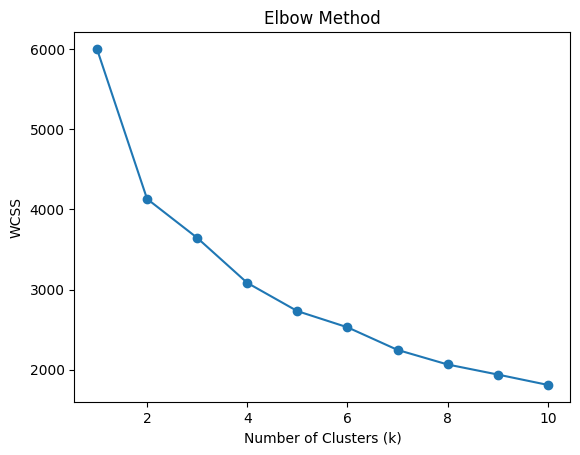

In [10]:
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [15]:
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
cluster_analysis

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Cluster,,,,,,,,
0,46.114220,6.505780,13.556733,284.691386,271.134653,4.761905,13.556733,7.626590
1,76.259321,8.350943,31.421764,659.857047,628.435283,4.761905,31.421764,6.598113
2,50.148817,2.688946,6.071907,127.510057,121.438149,4.761905,6.071907,6.646272
